In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [29]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

### Exploring Data

In [30]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### From the above two table we conclude that some features have missing values, some features data need to be scaled and we need to convert some features from string to numeric 

In [32]:
total = training_data.isnull().sum().sort_values(ascending=False)
p1 = training_data.isnull().sum()/training_data.isnull().count()*100
p2 = (round(p1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, p2], axis=1, keys=['Total No. of Values', 'In Precent (%)'])
missing_data

,Total No. of Values,In Precent (%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


#### From the above table we can see that embarked feature has only 2 missing value, age feature has 177 missing values and cabin feature has 687 missing values

### Visualizing the Data

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Male')

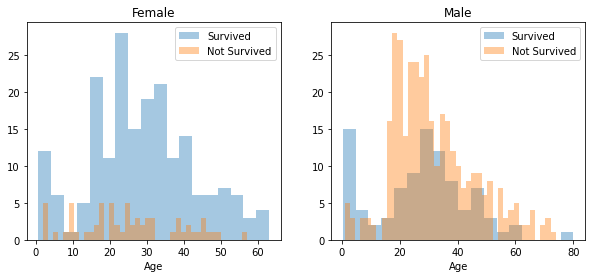

In [33]:
#Exploring the passengers survived based on age and sex
Survived = 'Survived'
Not_Survived = 'Not Survived'
fig, axis = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = training_data[training_data['Sex']=='female']
men = training_data[training_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = Survived, ax = axis[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = Not_Survived, ax = axis[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = Survived, ax = axis[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = Not_Survived, ax = axis[1], kde = False)
ax.legend()
ax.set_title('Male')

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


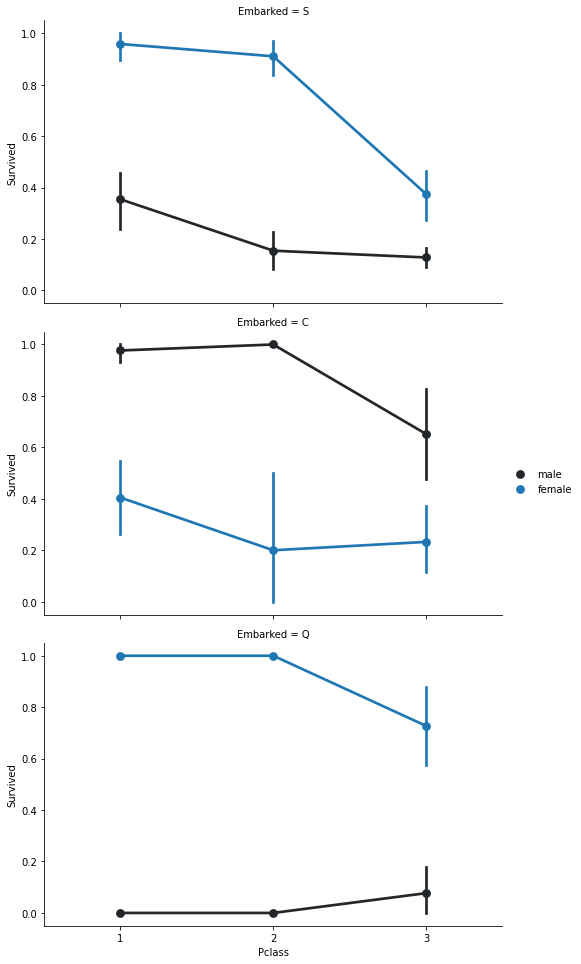

In [34]:
#To visualize males and females survived based on thier port 
fg = sns.FacetGrid(training_data, row='Embarked', size=4.5, aspect=1.6)
fg.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
fg.add_legend()

#### From the above plot we conclude that womens embarked in port Q and S has high chance of survival and men embarked in port c has high chance of survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

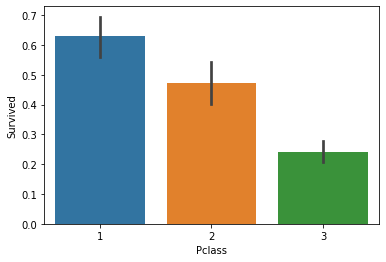

In [35]:
#To understand which class passengers has high chance of Survival
sns.barplot(x='Pclass', y='Survived', data=training_data)

In [36]:
#To calculate total number of relatives of a particular person and marked person Alone or Not_Alone
dt = [training_data, testing_data]
for dataset in dt:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'Not_Alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'Not_Alone'] = 1
    dataset['Not_Alone'] = dataset['Not_Alone'].astype(int)
training_data['Not_Alone'].value_counts()

1    537
0    354
Name: Not_Alone, dtype: int64

#### From here we understnd that 537 passengers are with thier relatives and 354 passengers are traveling alone

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


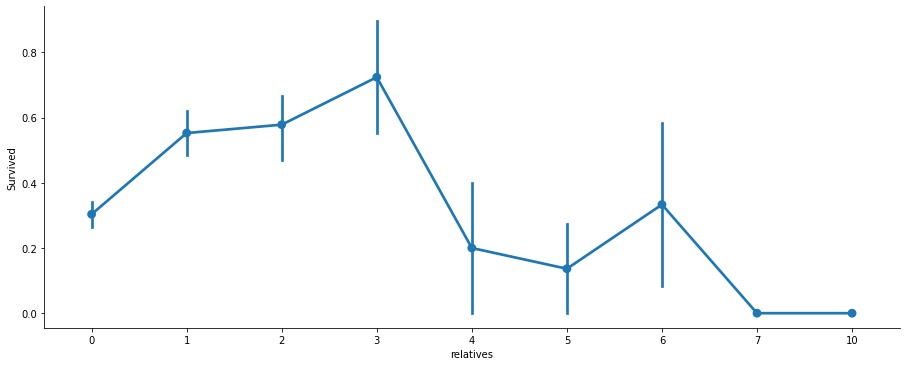

In [37]:
ax = sns.factorplot('relatives','Survived', 
                      data=training_data, aspect = 2.5)

#### From the above plot we conclude that passengers with number of relatives between 1-3 have high chance of survival

In [38]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


### Data Pre-processing

In [39]:
# Dropping PassengerId feature from Training Dataset as it does not contribute
# to the factor of survival
training_data = training_data.drop(['PassengerId'], axis=1)

In [40]:
training_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Not_Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [41]:
#Managing missing values of Cabin Feature
#Extracting deck variable from cabin feature and making a new feature out of 
#it named 'Deck'. Will store deck variable in numeric form and then drop Cabin feature 
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [training_data, testing_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
training_data = training_data.drop(['Cabin'], axis=1)
testing_data = testing_data.drop(['Cabin'], axis=1)

In [43]:
training_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not_Alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


In [50]:
#Managing missing values of Age Feature
data = [training_data, testing_data]

for dataset in data:
    mean = training_data["Age"].mean()
    std = testing_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random ages between the mean, std and is_null
    
    random_ages = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    
    age = dataset["Age"].copy()
    age[np.isnan(age)] = random_ages
    dataset["Age"] = age
    dataset["Age"] = training_data["Age"].astype(int)

In [53]:
training_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not_Alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0,1,3


In [55]:
print('Total number of null values of Age Feature',training_data["Age"].isnull().sum())

Total number of null values of Age Feature 0


In [57]:
#Finding common value of feature Embarked
training_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [58]:
#Filling null value with common value 
common_value = 'S'
data = [training_data, testing_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [59]:
#Converting Fare feature from float to int and filling null value with 0
data = [training_data, testing_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [60]:
#Converting names of passenger from string to int
data = [training_data, testing_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # Replacing NaN with 0
    dataset['Title'] = dataset['Title'].fillna(0)
training_data = training_data.drop(['Name'], axis=1)
testing_data = testing_data.drop(['Name'], axis=1)

In [61]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,211536,13,S,0,1,8,5
887,1,1,female,19,0,0,112053,30,S,0,1,2,2
888,0,3,female,28,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,male,26,0,0,111369,30,C,0,1,3,1


In [63]:
#Converting gender feature from string to int
gender = {"male": 0, "female": 1}
data = [training_data, testing_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [64]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,211536,13,S,0,1,8,5
887,1,1,1,19,0,0,112053,30,S,0,1,2,2
888,0,3,1,28,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,0,26,0,0,111369,30,C,0,1,3,1


In [65]:
#Dropping Ticket feature which is of no use
training_data = training_data.drop(['Ticket'], axis=1)
testing_data = testing_data.drop(['Ticket'], axis=1)

In [66]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,0,8,1
1,1,1,1,38,1,0,71,C,1,0,3,3
2,1,3,1,26,0,0,7,S,0,1,8,2
3,1,1,1,35,1,0,53,S,1,0,3,3
4,0,3,0,35,0,0,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S,0,1,8,5
887,1,1,1,19,0,0,30,S,0,1,2,2
888,0,3,1,28,1,2,23,S,3,0,8,2
889,1,1,0,26,0,0,30,C,0,1,3,1


In [67]:
#Converting Embarked feature from string to int
embarked = {"S": 0, "C": 1, "Q": 2}
data = [training_data, testing_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [68]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,8,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1,8,5
887,1,1,1,19,0,0,30,0,0,1,2,2
888,0,3,1,28,1,2,23,0,3,0,8,2
889,1,1,0,26,0,0,30,1,0,1,3,1


In [71]:
#Converting age feature from float to int and grouping it based on age groups
data = [training_data, testing_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [72]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,0,0,1,0,7,0,1,0,8,1
1,1,1,1,0,1,0,71,1,1,0,3,3
2,1,3,1,0,0,0,7,0,0,1,8,2
3,1,1,1,0,1,0,53,0,1,0,3,3
4,0,3,0,0,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,13,0,0,1,8,5
887,1,1,1,0,0,0,30,0,0,1,2,2
888,0,3,1,0,1,2,23,0,3,0,8,2
889,1,1,0,0,0,0,30,1,0,1,3,1


In [73]:
#Converting age feature from float to int and grouping it based on fare groups
data = [training_data, testing_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [74]:
training_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,0,3,0,0,1,0,0,0,1,0,8,1
1,1,1,1,0,1,0,3,1,1,0,3,3
2,1,3,1,0,0,0,0,0,0,1,8,2
3,1,1,1,0,1,0,3,0,1,0,3,3
4,0,3,0,0,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,0,0,1,8,5
887,1,1,1,0,0,0,2,0,0,1,2,2
888,0,3,1,0,1,2,2,0,3,0,8,2
889,1,1,0,0,0,0,2,1,0,1,3,1


In [75]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,892,3,0,0,0,0,0,2,0,1,8,1
1,893,3,1,0,1,0,0,0,1,0,8,3
2,894,2,0,0,0,0,1,2,0,1,8,1
3,895,3,0,0,0,0,1,0,0,1,8,1
4,896,3,1,0,1,1,1,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,0,1,0,0,1,8,1
414,1306,1,1,0,0,0,4,1,0,1,3,5
415,1307,3,0,0,0,0,0,0,0,1,8,1
416,1308,3,0,0,0,0,1,0,0,1,8,1


### Applying KNN Algorithm

In [77]:
X_train = training_data.drop("Survived", axis=1)
Y_train = training_data["Survived"]
X_test  = testing_data.drop("PassengerId", axis=1).copy()

In [78]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not_Alone,Deck,Title
0,3,0,0,1,0,0,0,1,0,8,1
1,1,1,0,1,0,3,1,1,0,3,3
2,3,1,0,0,0,0,0,0,1,8,2
3,1,1,0,1,0,3,0,1,0,3,3
4,3,0,0,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,1,0,0,1,8,5
887,1,1,0,0,0,2,0,0,1,2,2
888,3,1,0,1,2,2,0,3,0,8,2
889,1,0,0,0,0,2,1,0,1,3,1


In [79]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [81]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [82]:
Y_test = knn.predict(X_test)

In [83]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [86]:
print('Training Data Score',knn.score(X_train,Y_train))
print('Testing Data Score',knn.score(X_test,Y_test))

Training Data Score 0.8574635241301908
Testing Data Score 1.0


### So by using KNN Algorithm we are getting score of 1 on our testing data.